In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#dataset
disease_df = pd.read_csv("framingham.csv")


In [ ]:
#preprocessing
#dropping column with no relation to TenYearCHD
disease_df.drop(['education'], inplace = True, axis = 1)

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


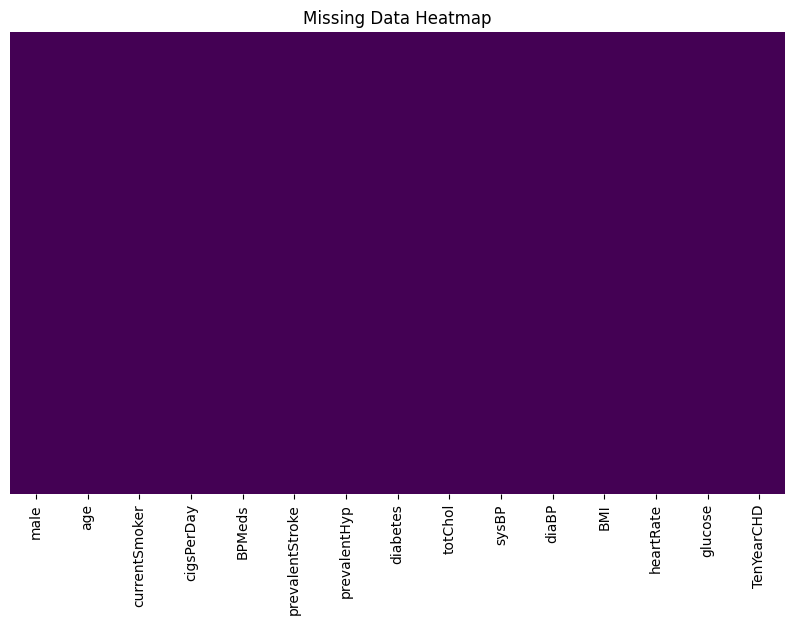

In [ ]:
#analyzing missing values
print(disease_df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(disease_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
#filling missing values
#heartrate has just 1 missing value so it can be filled with simple mean
disease_df['heartRate'].fillna(disease_df['heartRate'].mean(), inplace=True)


<ipython-input-102-2bde6d0ab10f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease_df['heartRate'].fillna(disease_df['heartRate'].mean(), inplace=True)


In [ ]:
#BMI has very few missing values and can be easily filled using median of all BMI
disease_df['BMI'].fillna(disease_df['BMI'].median(), inplace=True)

<ipython-input-103-bc70f70ba901>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease_df['BMI'].fillna(disease_df['BMI'].median(), inplace=True)


In [ ]:
#smokers also have a low amount of missing values and thus can be filled by median easily
#but we need to ignore non-smokers here to accurately identify smoking patterns of actual smokers (assuming all missing values belong to smokers)
smokers_median = disease_df[disease_df['cigsPerDay'] > 0]['cigsPerDay'].median()
disease_df['cigsPerDay'].fillna(smokers_median, inplace=True)


<ipython-input-104-f17abc7cf90b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease_df['cigsPerDay'].fillna(smokers_median, inplace=True)


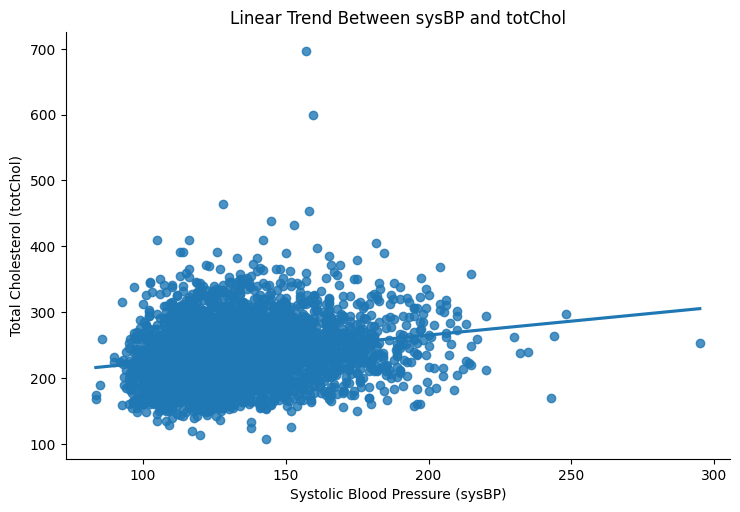

In [ ]:
#there could be a close relation b/w sysBP and totChol as both are related to each other and it may help us in filling the values

sns.lmplot(x='sysBP', y='totChol', data=disease_df, ci=None, aspect=1.5)
plt.title('Linear Trend Between sysBP and totChol')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Total Cholesterol (totChol)')
plt.show()

#the relation is not very close so we will not use it

In [ ]:
#filling missing totchol and BPMeds values by simple median values

disease_df['totChol'].fillna(disease_df['totChol'].median(), inplace=True)
disease_df['BPMeds'].fillna(disease_df['BPMeds'].median(), inplace=True)


<ipython-input-106-266e35428830>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease_df['totChol'].fillna(disease_df['totChol'].median(), inplace=True)
<ipython-input-106-266e35428830>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
#glucose has a lot of missing values so simple mean or median will give inaccurate results, KNN is a good alternative as it uses relations with sBP, dBP, Chol, diab to fill glucose values which is much more accurate
from sklearn.preprocessing import MinMaxScaler

#create a new dataframe for imputation
features = ['sysBP', 'diaBP', 'totChol']
knn_df = disease_df[features + ['glucose']].copy()

#initialize a scaler
scaler = MinMaxScaler()

#normalize the selected features
knn_scaled = scaler.fit_transform(knn_df)

from sklearn.impute import KNNImputer

#initialize the KNN imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

#perform the imputation
knn_imputed = imputer.fit_transform(knn_scaled)

#transform back to the original scale
knn_df_imputed = pd.DataFrame(scaler.inverse_transform(knn_imputed), columns=features + ['glucose'])

#replace the 'glucose' column in the original dataframe with the imputed values
disease_df['glucose'] = knn_df_imputed['glucose']


In [ ]:
#verifying all missing values are filled
print(disease_df.isnull().sum())


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
#seperating Features and Target
X = np.asarray(disease_df[['age', 'male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','diaBP','BMI','heartRate', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

#normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

#train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3)


<ipython-input-110-22dca55f9c4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


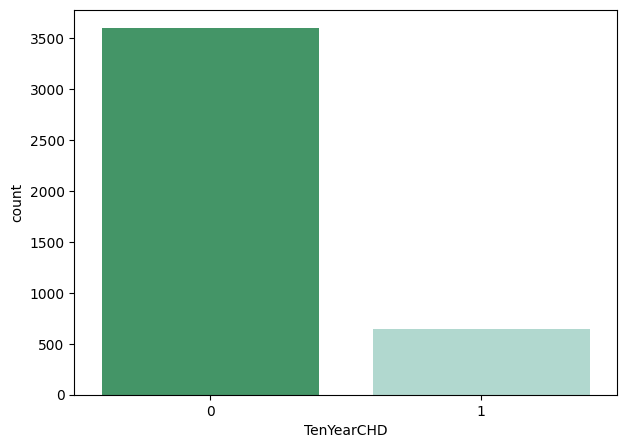

In [ ]:
#counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

In [ ]:
#training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [ ]:
#evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression model is =',
      accuracy_score(y_test, y_pred_lr))

Accuracy of Logistic Regression model is = 0.8498427672955975


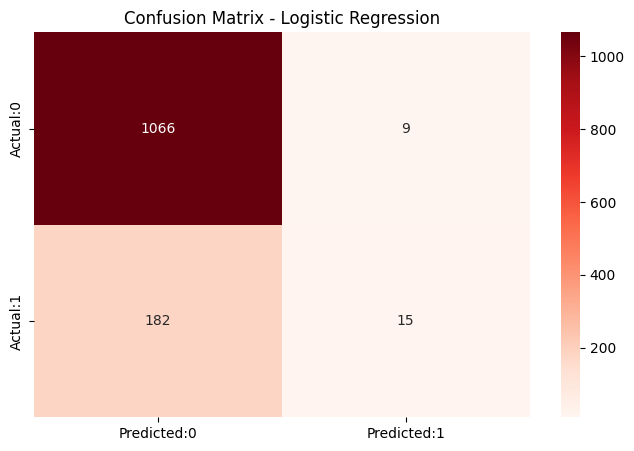

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1075
           1       0.62      0.08      0.14       197

    accuracy                           0.85      1272
   macro avg       0.74      0.53      0.53      1272
weighted avg       0.82      0.85      0.80      1272



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_lr = pd.DataFrame(data = cm_lr,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix_lr, annot = True, fmt = 'd', cmap = "Reds")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print('The details for confusion matrix is =')
report_lr=classification_report(y_test, y_pred_lr, output_dict=True)
print(classification_report(y_test, y_pred_lr))

In [ ]:
#training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
#evaluation and accuracy
print('Accuracy of Decision Tree model is =',
      accuracy_score(y_test, y_pred_dt))

Accuracy of Decision Tree model is = 0.75


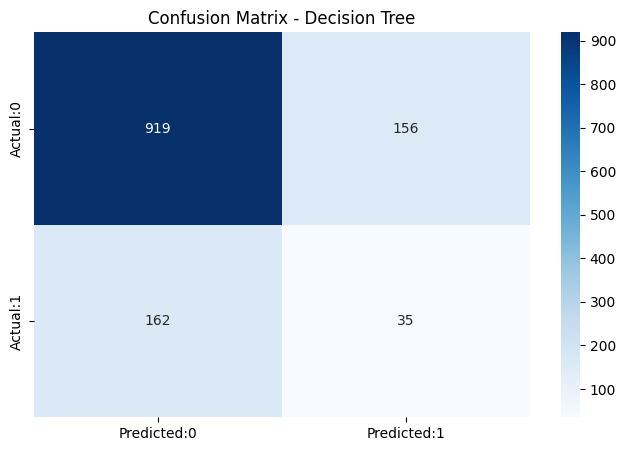

The details for confusion matrix are:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1075
           1       0.18      0.18      0.18       197

    accuracy                           0.75      1272
   macro avg       0.52      0.52      0.52      1272
weighted avg       0.75      0.75      0.75      1272



In [ ]:
#confusion Matrix for Decision Tree

cm_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt = pd.DataFrame(data=cm_dt,
                              columns=['Predicted:0', 'Predicted:1'],
                              index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

print('The details for confusion matrix are:')
report_dt=classification_report(y_test, y_pred_dt, output_dict=True)
print(classification_report(y_test, y_pred_dt))

In [ ]:
#training a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#evaluation and accuracy
print('Accuracy of Random Forest model is =',
      accuracy_score(y_test, y_pred_rf))

Accuracy of Random Forest model is = 0.8443396226415094


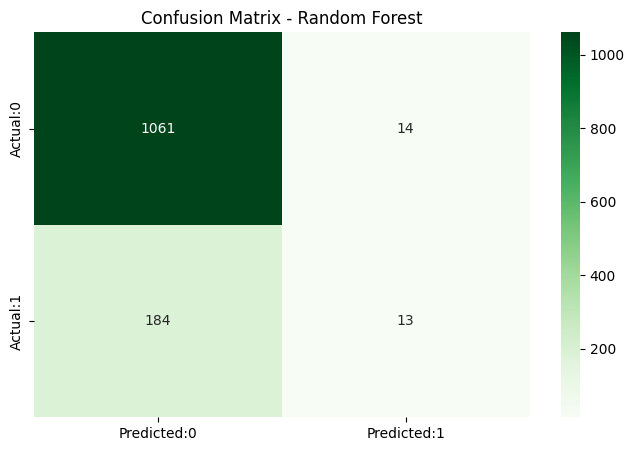

The details for confusion matrix are:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1075
           1       0.48      0.07      0.12       197

    accuracy                           0.84      1272
   macro avg       0.67      0.53      0.52      1272
weighted avg       0.79      0.84      0.79      1272



In [ ]:
#confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf = pd.DataFrame(data=cm_rf,
                              columns=['Predicted:0', 'Predicted:1'],
                              index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print('The details for confusion matrix are:')
report_rf=classification_report(y_test, y_pred_rf, output_dict=True)
print(classification_report(y_test, y_pred_rf))

In [ ]:
#compare all the models
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        report_lr["accuracy"],
        report_dt["accuracy"],
        report_rf["accuracy"]
    ],
    "Precision (Class 1)": [
        report_lr["1"]["precision"],
        report_dt["1"]["precision"],
        report_rf["1"]["precision"]
    ],
    "Recall (Class 1)": [
        report_lr["1"]["recall"],
        report_dt["1"]["recall"],
        report_rf["1"]["recall"]
    ],
    "F1-Score (Class 1)": [
        report_lr["1"]["f1-score"],
        report_dt["1"]["f1-score"],
        report_rf["1"]["f1-score"]
    ]
})

#display comparison table
print("Comparison of Models:")
print(comparison)

Comparison of Models:
                 Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0  Logistic Regression  0.849843             0.625000          0.076142   
1        Decision Tree  0.750000             0.183246          0.177665   
2        Random Forest  0.844340             0.481481          0.065990   

   F1-Score (Class 1)  
0            0.135747  
1            0.180412  
2            0.116071  
